In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
%reload_ext autoreload
%autoreload 2


#### Load, Visualize and General: Unemployment Dataset

In [9]:

df = pd.read_csv('Unemployment.csv') #import dataset

In [10]:
df.columns

Index(['FIPS', 'State', 'Area_name', 'Rural_urban_continuum_code_2013',
       'Urban_influence_code_2013', 'Metro_2013',
       ' Civilian_labor_force_2007 ', ' Employed_2007 ', ' Unemployed_2007 ',
       'Unemployment_rate_2007', ' Civilian_labor_force_2008 ',
       ' Employed_2008 ', ' Unemployed_2008 ', 'Unemployment_rate_2008',
       'Civilian_labor_force_2009', 'Employed_2009', 'Unemployed_2009',
       'Unemployment_rate_2009', ' Civilian_labor_force_2010 ',
       ' Employed_2010 ', ' Unemployed_2010 ', 'Unemployment_rate_2010',
       ' Civilian_labor_force_2011 ', ' Employed_2011 ', ' Unemployed_2011 ',
       'Unemployment_rate_2011', ' Civilian_labor_force_2012 ',
       ' Employed_2012 ', ' Unemployed_2012 ', 'Unemployment_rate_2012',
       ' Civilian_labor_force_2013 ', ' Employed_2013 ', ' Unemployed_2013 ',
       'Unemployment_rate_2013', ' Civilian_labor_force_2014 ',
       ' Employed_2014 ', ' Unemployed_2014 ', 'Unemployment_rate_2014',
       ' Civilian_labor_

#### Data Cleaning: Median_Household_Income_2017

In [11]:
df_2017= df[['FIPS',"State","Area_name","Unemployment_rate_2017","Median_Household_Income_2017"]]

In [12]:
df_2017 = df_2017.dropna()

In [13]:
df_2017

,FIPS,State,Area_name,Unemployment_rate_2017,Median_Household_Income_2017
0,0,US,United States,4.4,"$60,336"
1,1000,AL,Alabama,4.4,"$48,193"
2,1001,AL,"Autauga County, AL",3.9,"$58,343"
3,1003,AL,"Baldwin County, AL",4.1,"$56,607"
4,1005,AL,"Barbour County, AL",5.8,"$32,490"
...,...,...,...,...,...
3191,56037,WY,"Sweetwater County, WY",4.5,"$75,590"
3192,56039,WY,"Teton County, WY",2.8,"$90,145"
3193,56041,WY,"Uinta County, WY",4.5,"$67,404"
3194,56043,WY,"Washakie County, WY",4.0,"$57,989"


In [14]:
# Remove Dollar Sign and Comma

In [15]:
df_2017['Median_Household_Income_2017'] = df_2017.Median_Household_Income_2017.apply(lambda x: x.replace('$',''))
df_2017['Median_Household_Income_2017'] = [col.replace(',', '') for col in df_2017.Median_Household_Income_2017]
df_2017['Median_Household_Income_2017'] = df_2017['Median_Household_Income_2017'].astype("int")
df_2017['Unemployment_rate_2017'] = df_2017['Unemployment_rate_2017'].astype("int")
df_2017['FIPS'] = df_2017['FIPS'].apply(lambda x: "{0:0=5d}".format(x))

In [16]:
df_2017

,FIPS,State,Area_name,Unemployment_rate_2017,Median_Household_Income_2017
0,00000,US,United States,4,60336
1,01000,AL,Alabama,4,48193
2,01001,AL,"Autauga County, AL",3,58343
3,01003,AL,"Baldwin County, AL",4,56607
4,01005,AL,"Barbour County, AL",5,32490
...,...,...,...,...,...
3191,56037,WY,"Sweetwater County, WY",4,75590
3192,56039,WY,"Teton County, WY",2,90145
3193,56041,WY,"Uinta County, WY",4,67404
3194,56043,WY,"Washakie County, WY",4,57989


In [24]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3193 entries, 0 to 3195
Data columns (total 5 columns):
FIPS                            3193 non-null object
State                           3193 non-null object
Area_name                       3193 non-null object
Unemployment_rate_2017          3193 non-null int64
Median_Household_Income_2017    3193 non-null int64
dtypes: int64(2), object(3)
memory usage: 149.7+ KB


### Dataframes 

In [25]:
FIPS_Median_Income_df = df_2017[['FIPS','Median_Household_Income_2017']]
FIPS_Median_Income_df

,FIPS,Median_Household_Income_2017
0,00000,60336
1,01000,48193
2,01001,58343
3,01003,56607
4,01005,32490
...,...,...
3191,56037,75590
3192,56039,90145
3193,56041,67404
3194,56043,57989


In [26]:
FIPS_Unemployment_df = df_2017[['FIPS', 'Unemployment_rate_2017']]
FIPS_Unemployment_df

,FIPS,Unemployment_rate_2017
0,00000,4
1,01000,4
2,01001,3
3,01003,4
4,01005,5
...,...,...
3191,56037,4
3192,56039,2
3193,56041,4
3194,56043,4


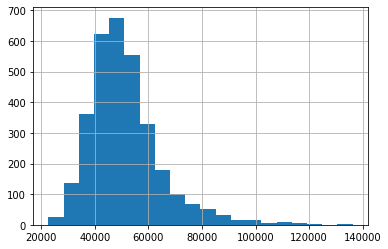

In [27]:
df_2017.Median_Household_Income_2017.hist(bins = 20)

### Summary Statistics:

In [28]:

median_income_mean = FIPS_Median_Income_df.loc[:,"Median_Household_Income_2017"].mean()
median_income_std = FIPS_Median_Income_df.loc[:,"Median_Household_Income_2017"].std()
print(median_income_mean)
print(median_income_std)

51240.013780144065
13498.36141646958


In [29]:
unemployment_mean= FIPS_Unemployment_df.loc[:,"Unemployment_rate_2017"].mean()
unemployment_std = FIPS_Unemployment_df.loc[:,"Unemployment_rate_2017"].std()

In [30]:
print(unemployment_mean)
print(unemployment_std)

4.142499217037269
1.6825213483926453


In [31]:
z_data = [(x - FIPS_Median_Income_df['Median_Household_Income_2017'].mean())/FIPS_Median_Income_df['Median_Household_Income_2017'].std() for x in FIPS_Median_Income_df['Median_Household_Income_2017']]

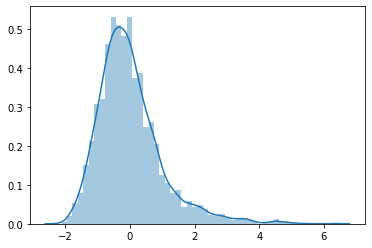

In [32]:
sns.distplot(z_data)